# <p style="background-color:green; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project</p>
## <p style="background-color:green; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Employee Retention Prediction</p>

![My Image](first_img.jpg)


<a id="import"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
# <p style="background-color:green ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [2]:
train_df = pd.read_csv('aug_train.csv')
test_df = pd.read_csv('D:\\BIA\\Capstone Project\\aug_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\BIA\\Capstone Project\\aug_test.csv'

In [ ]:
train_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
test_df

NameError: name 'test_df' is not defined

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [ ]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,2129.0,16861.614843,9576.846029,3.000,8562.000,16816.000,25129.00,33353.000
city_development_index,2129.0,0.824984,0.125074,0.448,0.698,0.903,0.92,0.949
training_hours,2129.0,64.983091,60.238660,1.000,23.000,47.000,86.00,334.000


<a id="overview"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [ ]:
train_df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [ ]:
test_df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [ ]:
null_values_summary = train_df.isnull().sum()
null_values_summary

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
def fill_with_random_choice(df):
    return df.apply(lambda x: np.random.choice([0, 1, 2]) if pd.isnull(x) else x)

df_filled = train_df.apply(fill_with_random_choice)

null_values_summary_after_filling = df_filled.isnull().sum()
null_values_summary_after_filling


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
train_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


<a id="eda"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>


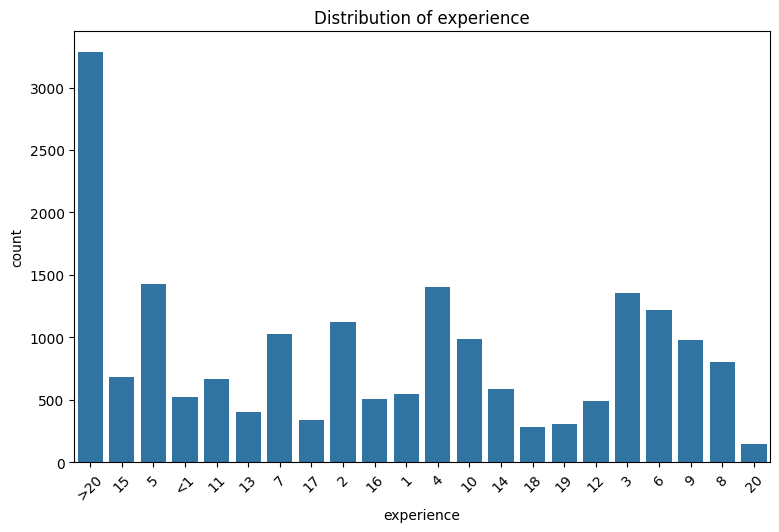

In [ ]:
categorical_columns = [ 'experience']

plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=train_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

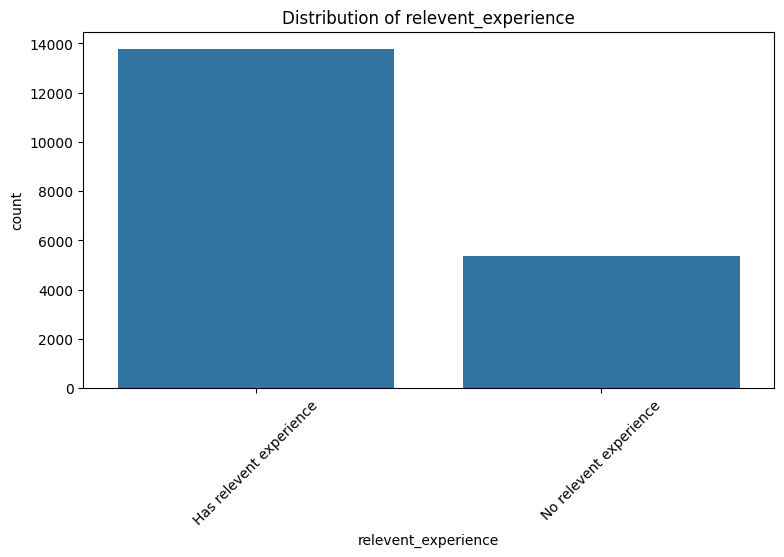

In [ ]:
categorical_columns = [ 'relevent_experience']

plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=train_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

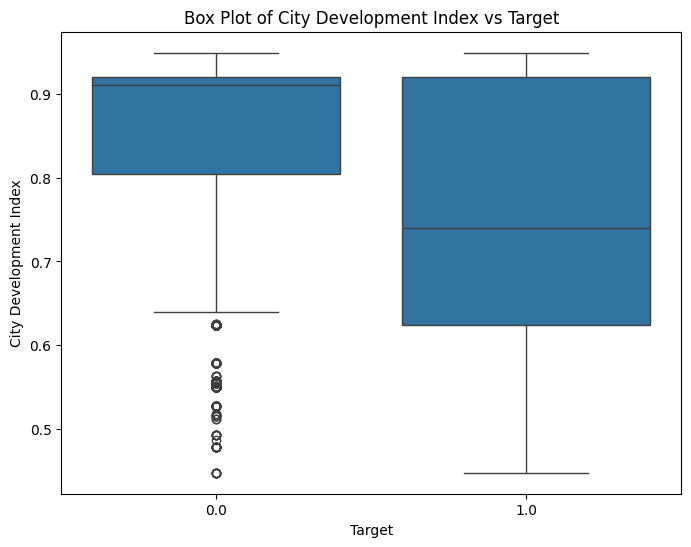

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='city_development_index', data=train_df)
plt.title('Box Plot of City Development Index vs Target')
plt.xlabel('Target')
plt.ylabel('City Development Index')
plt.show()

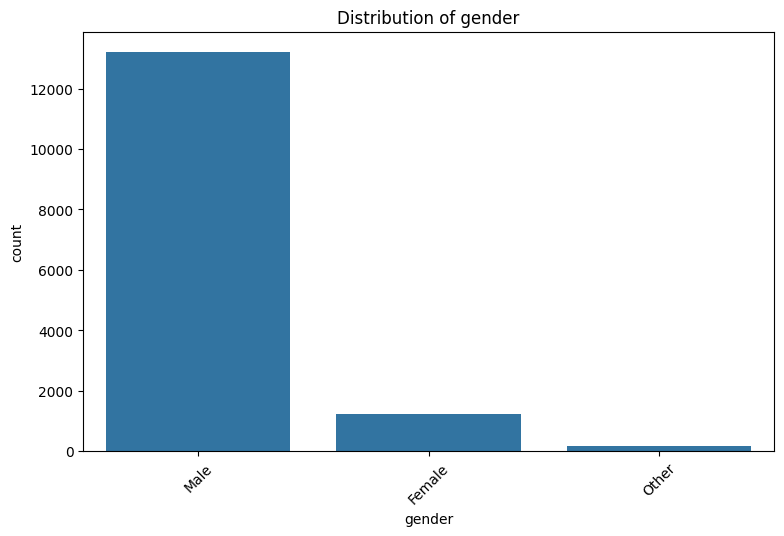

In [ ]:
categorical_columns = [ 'gender']

plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=train_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

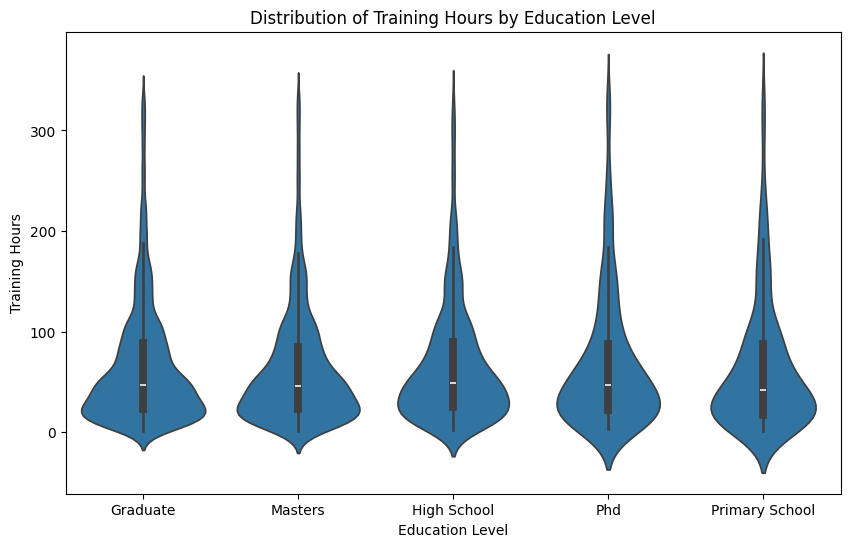

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='education_level', y='training_hours', data=train_df)

plt.xlabel('Education Level')
plt.ylabel('Training Hours')
plt.title('Distribution of Training Hours by Education Level')

plt.show()

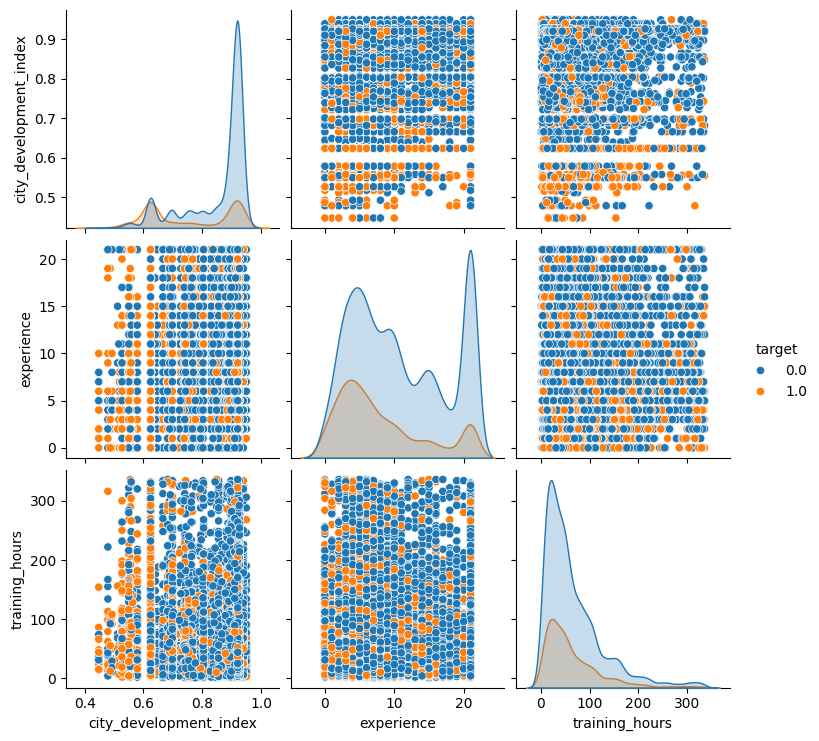

In [ ]:
train_df['experience'] = train_df['experience'].replace({'>20': 21, '<1': 0}).astype(float)

selected_columns = ['city_development_index', 'experience', 'training_hours', 'target']

sns.pairplot(train_df[selected_columns], hue='target')
plt.show()

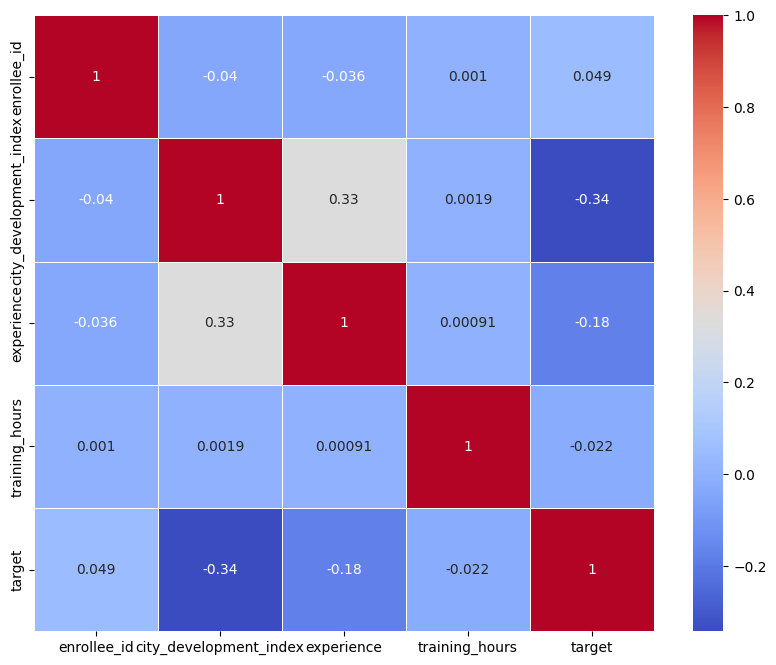

In [ ]:
numeric_data = train_df.select_dtypes(include='number')

corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

# Missing Value

In [ ]:
train_df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# See the unique values in the columns of Dataset

In [ ]:
train_df['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [ ]:
train_df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [ ]:
train_df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [ ]:
train_df['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [ ]:
train_df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [ ]:
train_df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [ ]:
train_df['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [ ]:
train_df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

# Missing Values Filling

In [ ]:
train_df['gender'].fillna('Unknown', inplace=True)
train_df['enrolled_university'].fillna('no_enrollment', inplace=True)
train_df['education_level'].fillna(train_df['education_level'].mode()[0], inplace=True)
train_df['major_discipline'].fillna('Other', inplace=True)
train_df['experience'].fillna(train_df['experience'].mode()[0], inplace=True)
train_df['company_size'].fillna('Unknown', inplace=True)
train_df['company_type'].fillna('Other', inplace=True)
train_df['last_new_job'].fillna(train_df['last_new_job'].mode()[0], inplace=True)

# Re-checking Missing Values Here Sister🙋‍♂️

In [ ]:
train_df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# convert object data type into Numerical Datatype of some columns

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

categorical_columns = ['gender', 'relevent_experience', 'enrolled_university',
                       'education_level', 'major_discipline', 'company_size',
                       'company_type', 'last_new_job']

for col in categorical_columns:
    train_df[col] = le.fit_transform(train_df[col])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  int32  
 4   relevent_experience     19158 non-null  int32  
 5   enrolled_university     19158 non-null  int32  
 6   education_level         19158 non-null  int32  
 7   major_discipline        19158 non-null  int32  
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  int32  
 10  company_type            19158 non-null  int32  
 11  last_new_job            19158 non-null  int32  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int32(8), int64(2), obj

#above you can see that data type type of some column has changed

#but experience no datatype haji pan object chhe So......

# let's convert the Experience to numerical values

In [ ]:
train_df['experience'] = train_df['experience'].replace({'>20': 21, '<1': 0.5}).astype(float)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  int32  
 4   relevent_experience     19158 non-null  int32  
 5   enrolled_university     19158 non-null  int32  
 6   education_level         19158 non-null  int32  
 7   major_discipline        19158 non-null  int32  
 8   experience              19158 non-null  float64
 9   company_size            19158 non-null  int32  
 10  company_type            19158 non-null  int32  
 11  last_new_job            19158 non-null  int32  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(3), int32(8), int64(2), obj

#now you see the data type of experience column has changed

# Chal to have thodik nakami columns ne drop kariye

#i think there is a column named enrollee_id is unnecessary so i drop this

In [ ]:
train_df.drop(columns=['enrollee_id'], inplace=True)

In [ ]:
train_df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,1,0,2,0,5,21.0,8,3,0,36,1.0
1,city_40,0.776,1,1,2,0,5,15.0,4,5,4,47,0.0
2,city_21,0.624,3,1,0,0,5,5.0,8,3,5,83,0.0
3,city_115,0.789,3,1,2,0,1,0.5,8,5,5,52,1.0
4,city_162,0.767,1,0,2,2,5,21.0,4,1,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,1,1,2,0,2,14.0,8,3,0,42,1.0
19154,city_103,0.920,1,0,2,0,5,14.0,8,3,3,52,1.0
19155,city_103,0.920,1,0,2,0,5,21.0,4,5,3,44,0.0
19156,city_65,0.802,1,0,2,1,4,0.5,5,5,1,97,0.0


#Now you see, your data is become much better than first

# -------------------------------------------------------------------------------

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [ ]:
numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical, numerical_cols),
        ('cat', categorical, categorical_cols)
    ])

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15326, 12), (3832, 12), (15326,), (3832,))

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city_development_index', 'experience', 'training_hours'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = model.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Classification Report:\n", classification_report(y_train, y_pred))


Accuracy: 0.9977815476967246
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11504
         1.0       1.00      1.00      1.00      3822

    accuracy                           1.00     15326
   macro avg       1.00      1.00      1.00     15326
weighted avg       1.00      1.00      1.00     15326



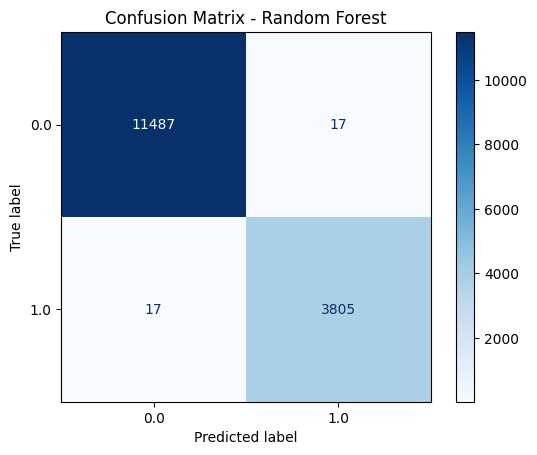

In [ ]:
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

<a id="rf"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Random Forest Model Building</p>


In [ ]:
rf_base = RandomForestClassifier(random_state=0)